## Visualizacion de las diversas olas durante la pandemia del Sars Covid-19
### Casos de contagios en la ciudad de cordoba - Argentina.
En esta notebook analizaremos los datos provistos por el Gobierno de la municipalida de cordoba
desde el inicio de la pandemia a nivel nacional hasta el *31 de diciembre de 2021*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from datetime import datetime as dt

In [3]:
with open("datosCovid31enero2021.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

 ## DataSet
 
 El dataset esta disponible en formato csv.
 De todas formas este fue extraido y modificado en el siguiente [link](https://gobiernoabierto.cordoba.gob.ar/data/datos-abiertos/categoria/salud/casos-registrados-covid-19/2948), este contiene notas dentro del archivo por lo que se debio extraerlo a mano.

In [4]:
df = pd.read_csv("datosCovid31enero2021.csv", delimiter=';')
df.columns = ["fecha", 
              "casos_ciudad_cba_acumulado",
              "casos_provincia_cba_acumulado",
              "fallecidos_provincia_cba_acumulado",
              "nuevos_casos_dia_ciudad_cba",
              "nuevos_casos_dia_provincia_cba",
              "notas"]
df

,fecha,casos_ciudad_cba_acumulado,casos_provincia_cba_acumulado,fallecidos_provincia_cba_acumulado,nuevos_casos_dia_ciudad_cba,nuevos_casos_dia_provincia_cba,notas
0,25/3/2020,21,49,0,NaN,NaN,-
1,26/3/2020,22,52,0,1,3,-
2,28/3/2020,24,56,0,2,4,-
3,29/3/2020,30,73,0,6,17,-
4,30/3/2020,30,80,0,0,7,-
...,...,...,...,...,...,...,...
671,26/1/2022,398122,880246,7512,2476,8468,509
672,27/1/2022,399951,887889,7550,1829,7494,510
673,28/1/2022,401467,894156,7569,1516,6108,511
674,29/1/2022,402243,896879,7574,776,2582,512


In [5]:
print("Ultima fecha registrada")
df.iloc[-1]

Ultima fecha registrada


fecha                                 30/1/2022
casos_ciudad_cba_acumulado               402659
casos_provincia_cba_acumulado            898114
fallecidos_provincia_cba_acumulado         7582
nuevos_casos_dia_ciudad_cba                 416
nuevos_casos_dia_provincia_cba             1127
notas                                       513
Name: 675, dtype: object

In [6]:
nodo_fecha = list()
nodo_contagios_ciudad_cba = list()
#nodo_contagios_provincia_cba = list()

for i in range(len(df)):
    nodo_contagios_ciudad_cba.append(float(df.iloc[i,4]) if df.iloc[i,4] not in ["-", "sin dato"] and type(df.iloc[i,4]) == str else 0.0)
    #nodo_contagios_provincia_cba.append(float(df.iloc[i,5]) if df.iloc[i,5] not in ["-", "sin dato"] and type(df.iloc[i,5]) == str else 0.0)
    nodo_fecha.append(dt.strptime(df.iloc[i,0], "%d/%m/%Y"))

In [7]:
count_casos_2020 = [0] * 12
count_casos_2021 = [0] * 12

for i in range(len(nodo_fecha)):
    if nodo_fecha[i].year == 2020:
        count_casos_2020[nodo_fecha[i].month-1] += nodo_contagios_ciudad_cba[i]
    elif nodo_fecha[i].year == 2021:
        count_casos_2021[nodo_fecha[i].month-1] += nodo_contagios_ciudad_cba[i]

## Primera Ola.
como se puede apreciar en el grafico,los primeros meses desde el inicio de la cuarentena en la Republica Argentina fueron relativamente controlable, pero los siguiente meses desde Julio a Octubre la ciudad tuvo un crecimiento exponencial en lo que respecta a los contagios registrados, durante los siguientes meses posteriores la tasa de contagios se empezo a calmar dando por finalizada la primera ola.

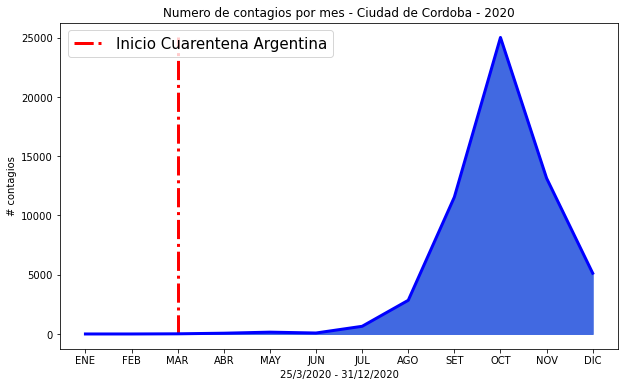

In [49]:
meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SET", "OCT", "NOV", "DIC"]
plt.figure(figsize=(10,6))
plt.plot(meses, count_casos_2020, color='b', linewidth=3)
plt.fill_between(meses, count_casos_2020, color="royalblue")
plt.title('Numero de contagios por mes - Ciudad de Cordoba - 2020')
plt.xlabel("25/3/2020 - 31/12/2020")
plt.ylabel("# contagios")

plt.vlines(x="MAR", ymin=0, ymax=max(count_casos_2020), linestyles="-.", linewidth=3, colors="r", label="Inicio Cuarentena Argentina")

plt.legend(fontsize=15)
plt.show()

## Segunda Ola 
La segunda Ola (2021) se clasificaria como la peor hasta ahora por que en su pico maximo de contagio represento casi el doble del maximo de contagios en el mes de octubre de la 2020 (Primera Ola), volviendo a decaer la tasa de contagios en los meses posteriores al pico.

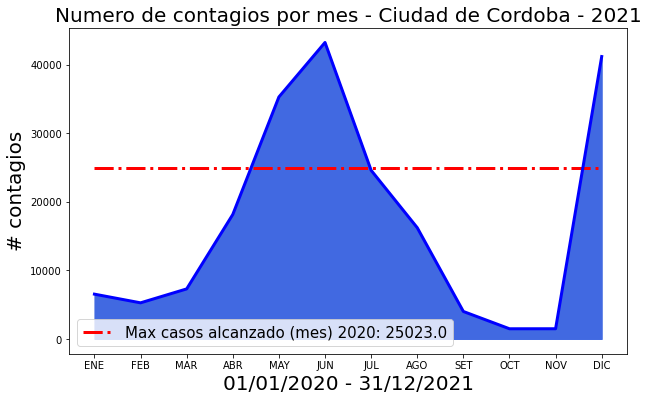

In [50]:
plt.figure(figsize=(10,6))
plt.plot(meses, count_casos_2021, color='b', linewidth=3)
plt.fill_between(meses, count_casos_2021, color="royalblue")
plt.title('Numero de contagios por mes - Ciudad de Cordoba - 2021', size= 20)
plt.xlabel("01/01/2020 - 31/12/2021", size= 20)
plt.ylabel("# contagios", size= 20)

plt.hlines(y=max(count_casos_2020), xmin="ENE", xmax="DIC", linewidth=3, linestyles="-.", color="r", label=f"Max casos alcanzado (mes) 2020: {max(count_casos_2020)}")

plt.legend(fontsize=15)
plt.show()

## Primera, Segunda e inicio de la Tercera Ola
El inicio del año 2022 fue recibido con el maximo de casos registrados de contagio que se registro por ultima vez durante la segunda ola (2021), si la tendencia es similar dentro de unos 2-4 meses los casos de contagios deberian bajar, por lo menos a nivel de la ciudad de cordoba.

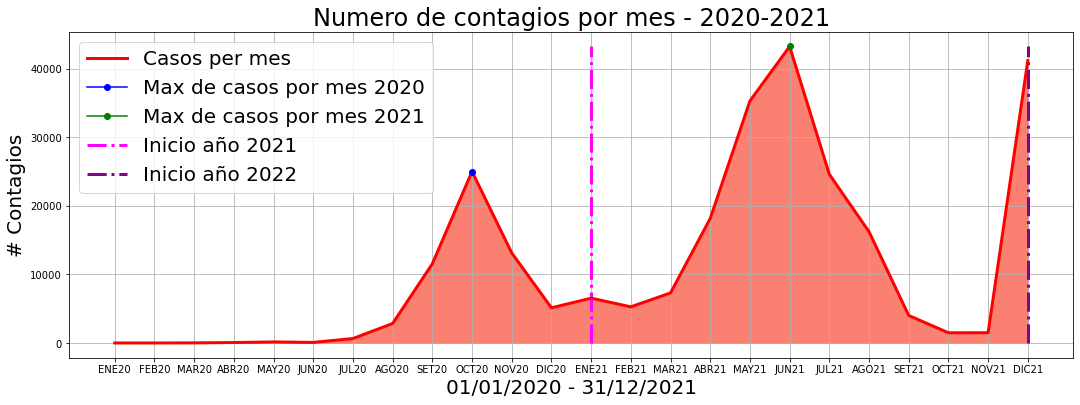

In [47]:
meseNumeros = list(map(lambda x: x + "20", meses)) + list(map(lambda x: x + "21", meses))

plt.figure(figsize=(18,6))
plt.plot(meseNumeros, (count_casos_2020 + count_casos_2021), linewidth=3 ,color='r', label="Casos per mes")
plt.fill_between(meseNumeros, (count_casos_2020 + count_casos_2021), color="salmon")
plt.title('Numero de contagios por mes - 2020-2021', size= 24)
plt.xlabel("01/01/2020 - 31/12/2021", size= 20)
plt.ylabel("# Contagios", size= 20)

plt.plot("OCT20",max(count_casos_2020), marker="o", color="b", label="Max de casos por mes 2020")
plt.plot("JUN21",max(count_casos_2021), marker="o", color="g", label="Max de casos por mes 2021")
plt.vlines(x="ENE21", ymin=0, ymax=max(count_casos_2021), linestyles="-.", linewidth=3, color="magenta", label="Inicio año 2021")
plt.vlines(x="DIC21", ymin=0, ymax=max(count_casos_2021), linestyles="-.", linewidth=3, color="darkmagenta", label="Inicio año 2022")

plt.legend(fontsize=20)
plt.grid()
plt.show()